# Homework 5 (100 Points)

For this homework we’ll be working with two years of the bicycle sharing systems for New York City (Citibike). The dataset contains daily bike trip counts, along with daily measurements on environmental and seasonal information that may affect the bikesharing.

Here’s information on what the variables mean.

- trips - daily total number of bike trips taken (all stations)
- precipitation - daily inches of rain
- snow_depth - daily inches of snow. Accoding to NOAA "Determine the depth of the new and old snow remaining on the ground at observation time".
- snowfall - according to NOAA "Measure and record the snowfall (snow, ice pellets ) since the previous snowfall observation (24 hours)."
- max_temperature - daily maximum temperature in Farenheit (highest temperature reached)
- min_temperature - daily minimum temperature in Farenheit (lowest temperature reached)
- average_wind_speed - measured hourly in mph and averaged for daily value
- year 
- holiday
    - True
    - False
- stations in service - docking stations working per day
- weekday
    - True
    - False
- weekday_non_holiday
    - True
    - False

More details on snow measurements [here](https://www.weather.gov/gsp/snow)

In [18]:
# All the libraries that we will need
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
%matplotlib inline

### Exercise 1: Data pre-processing (16 pts)

Let's start by loading and pre-processing our dataset.

a) Load the `bikes` dataset into a dataframe called `bikes`, and print the first five rows [2pt]

In [19]:
bikes = pd.read_csv("citibike.csv")
bikes.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,False,329,True,True
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,False,329,True,True
2,29540,0.059055,0.0,0.0,78.08,68.00,3.35540,2013,summer,8,False,329,False,False
3,35253,0.000000,0.0,0.0,80.06,66.02,5.14495,2013,summer,8,False,329,False,False
4,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,False,329,True,True


b) Check that there are no missing values in your dataset. If they are, take care of them appropriately [2pt]


In [38]:
bikes.isnull().sum()
bikes['average_wind_speed'] = bikes['average_wind_speed'].fillna(bikes.average_wind_speed.mean())
bikes.isnull().sum()

trips                  0
precipitation          0
snow_depth             0
snowfall               0
max_temperature        0
min_temperature        0
average_wind_speed     0
year                   0
season                 0
month                  0
holiday                0
stations_in_service    0
weekday                0
weekday_non_holiday    0
dtype: int64

c) Separate your dataset into two dataframe. One dataframe should contain the data for weekends and the other one for weekdays [4pt]

In [52]:
bikes_weekdays = bikes[bikes['weekday']==True]
bikes_weekends = bikes[bikes['weekday']==False]

d) Let's look at the number of bicycle rental (trips) per season! Draw a boxplot that displays this information for the whole dataset. As subplots, draw the boxplots for weekdays and weekends. Is there a differece in the distribution of trips between seasons? Is there a difference between weekdays and weekends? Explain. [8pts]

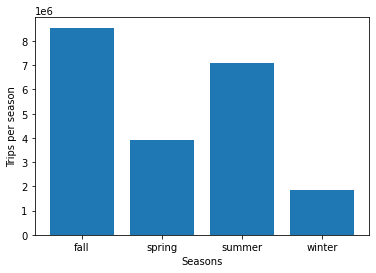

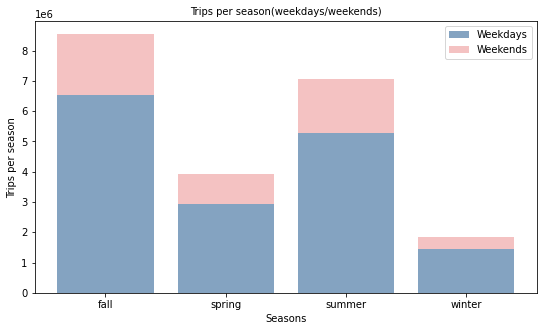

In [97]:
trips_per_season= bikes.groupby('season').trips.sum()
label = trips_per_season.index
index = np.arange(len(label))

plt.bar(index, trips_per_season)
plt.xticks(index, label)
plt.xlabel('Seasons')
plt.ylabel('Trips per season')
plt.show()

trips_per_season_wd = bikes_weekdays.groupby('season').trips.sum()
trips_per_season_we = bikes_weekends.groupby('season').trips.sum()
lab = trips_per_season_wd.index
inx = np.arange(len(lab))

fig, ax1 = plt.subplots(1, figsize = (9, 5))
p1 = ax1.bar(inx, trips_per_season_wd, color=(0.2, 0.4, 0.6, 0.6))
p2 = ax1.bar(inx, trips_per_season_we, color ='#f4c2c2' , bottom = trips_per_season_wd)
ax1.set_xticks(inx, lab, fontsize= 10)
ax1.set_xlabel('Seasons')
ax1.set_ylabel('Trips per season')
ax1.set_title('Trips per season(weekdays/weekends)', fontsize =10)
ax1.legend((p1[0], p2[0]), ('Weekdays', 'Weekends'), fontsize = 10)
plt.show()


--> Your answer here

## Exercise 2: Qualitative predictors (18 pts)

The Season variable is an example of what’s called a categorical predictor. This problem gets to fit a model with a qualitative predictor and to interpret the findings.

a) Fit a linear regression model with trips as the response variable and season as your predictor, and print the summary of this linear regression model. Use your weekdays dataset [4pt]


In [23]:
import statsmodels.formula.api as smf

In [24]:
# Your code here

b) How many total coefficients are there in the model? What does each coefficient correspond to? [4pt]

--> *Your answer here*

c) Interpret the coefficients of season in the model. Make sure to use an example in your interpretation, related to the bikes [4pt]

--> *Your answer here*

d) Repeat a) -> c) with your weekends dataset. What difference can you see? [6pt]

In [25]:
# Your code here

--> *Your answer here*

## Exercise 3: Multiple linear regression (16 pts)

In this problem we’ll practice fitting and interpreting the results of a multiple linear regression. For this question use the weekdays dataset.

a) Fit a regression model with trips as the response variable and the following predictors as features: snow_depth, snowfall, min_temperature, max_temperature, precipitation, month [4pt]


In [26]:
# Your code here

b) Interpret the coefficients of snow_depth, snowfall, min_temperature, max_temperature, precipitation, month in the model [4pt]

--> *Your answer here*

c) Re-run the model from 3)a) but add another predictor of your choice. Justify your choice of predictor. Did this make any difference? Did the R-squared of the model improve? [4pt]

In [27]:
# Your code here

--> *Your answer here*

d) From c) which predictors are associated with increased ridership? Which predictors are associated with decreased ridership? [2pt]

--> *Your answer here*

e) Which predictors are statistically significant (95% confidence level)? [2pt]

--> *Your answer here*

## Exercise 4: Dealing with collinearity (12 pts)

Highly correlated predictors can make interpreting regression coefficients problematic (they do not contribute relevant information for the model). Let’s evaluate this in our dataset. Continue using weekdays as your main dataset.

a) Check the variables used in Problem 3)a) to see if any of the predictors are highly correlated with one another. [2pt]


In [28]:
# your code here

--> Your answer here

b) Are any of the predictors highly correlated? Are you surprised that these predictors are highly correlated, or can you think of a reason for why it makes sense that they should be correlated? [2pt]

In [29]:
# Your code here

--> *Your answer here*

c) Fit your regression model, but this time omit the max or min temperature variable. Display the coefficients table for this model. [4pt]

In [30]:
# Your code here

d) What is the coefficient of temperature in this new model? Is it very different from the temperature coefficient estimated in part 3)a)? Is it statistically significant? Explain your findings. [4pt]

In [31]:
# Your code here
# You can add more cells if you need them

--> *Your answer here*

## Exercise 5: Exploring different models (38 pts)

*Continue using weekdays as your dataset.*

a) Construct a scatterplot of trips ~ month. Describe what you see. Does a linear relationship appear to be a good way of modeling how bikeshare count varies with month? [4pts]

In [32]:
# Your code here

--> *Your answer here*

b) Try out 3 different degrees of polynomial regression fits for modeling the relationship between trips and month. Do not do more than 3 models. Display all of them in the same plot (through subplots). Choose the subplot that appears to nicely capture the trends in the data. Be sure to print the $R^2$ or adjusted-$R^2$ for each subplot to help you with your decision. Explain your choice and include comments to explain your code. [8pts]

In [33]:
# Your code here
# You can add more cells if you need them

--> *Your answer here*

c) Repeat b) to determine appropriate degree polynomials for modeling the relationship between trip and the other inputs: temperature (pick one), snow (also pick one) and precipitation (i.e., trips ~ temperature, trips ~ snow, and trips ~precipitation). Justify your choices and include comment on your code. (Note: your polynomials can have different degrees for different features) [16pts]


In [34]:
# Your code here
# You can add more cells if you need them

--> *Your answer here*

d) Repeat 5)c) with the weekends dataset. Do you notice any differences? Justify your choices and include comment on your code. [10pts]

In [35]:
# Your code here
# You can add more cells if you need them

--> *Your answer here*